<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/case5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando a bibliotecas necessarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sidetable as stb
import statistics as sts
import warnings
warnings.filterwarnings('ignore')

Importanto o arquivo csv, porem o uso de encoding LATIN 1  se fez necesasrio por  algum caracter especial dentro do data frame, e depois passando funcao ,HEAD() para analisar se a importacao do dataframe foi realizado com exito.

In [ ]:
df=pd.read_csv(r"/Users/chenyenpin/Downloads/data.csv", encoding="latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Analise Descritiva

* Nas celulas abaixo, vamos utilizar os seguintes comandos.SHAPE,INFO, COLUMNS, DUPLICATED, ISNA, DESCRIBE
1. a funcao .SHAPE serve para sabermos o quantas linhas e colunas que o nosos dataframe tem
2. Utilizaremos a função info para conhecer os tipos dos dados e a quantidade de valores não nulos.
3. Podemos utilizar o comando isna().sum() para verificar se existem valores nulos no dataset.
4. A funcao .COLUMNS nos traz os nomes das colunas que vamos trabalhar
5. Podemos utilizar o comando duplicated().sum() para verificar se existem valores duplicados.
6. .DESCRIBE(), trara uma descricao dos valores numericos, tais como media, mediana, valores maximo e minimo.

Nessa fase exploraremos o nosso data set usando a biblioteca Pandas.


In [ ]:
#usando o Shape para sabermos quantas linhas e colunas que temos no nosso datase
df.shape

(541909, 8)

In [ ]:
#identeficando os nomes das colunas
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# entendendo os distribuicoes estatiticas  dataset
df.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
1%,-2.000000,0.190000,12415.000000
10%,1.000000,0.630000,12876.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
90%,24.000000,7.950000,17719.000000


In [ ]:
#usando o .info para saber as classes das variaveis  que temos nas colunas e contagens de valores nao nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# somando os valores nulos
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#encontrando percentual de valores ausentes
(
df.isna().sum()
.to_frame("Valores NA")
.assign(missing_pct=lambda x:x.div(len(df)))
.sort_values("Valores NA",ascending= False))

,Valores NA,missing_pct
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [ ]:
#identificando se ha valores UnitPrice com precos negativos
df.loc[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [ ]:
#identificando valores "QUANTITY" abaixo de 0
df.loc[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
# somando valores  duplicados
df.duplicated().sum()

5268

In [ ]:
#identificando os duplicados
(df.groupby(df.columns.to_list(), dropna=False)
 .size()
 .to_frame("duplicates")
 .query("duplicates > 1")
 .sort_values("duplicates", ascending= False)
 )


duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                   
555524    22698     PINK REGENCY TEACUP AND SAUCER       1       6/5/2011 11:37   2.95      16923.0    United Kingdom          20
          22697     GREEN REGENCY TEACUP AND SAUCER      1       6/5/2011 11:37   2.95      16923.0    United Kingdom          12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12      10/26/2011 12:46 1.25      14102.0    United Kingdom           8
541266    21755     LOVE BUILDING BLOCK WORD             1       1/16/2011 16:25  5.95      15673.0    United Kingdom           6
572344    M         Manual                               48      10/24/2011 10:43 1.50      14607.0    United Kingdom           6
...                                                                                                                           ...
556484    22326     ROUND SNACK BOXES SET OF4 WOODLAND   2       6/12/2011 13:17  2.95      16938.0    United Kingdom           2
          22139     RETROSPOT TEA SET CERAMIC 11 PC      1       6/12/2011 13:17  4.95      16938.0    United Kingdom           2
556481    23182     TOILET SIGN OCCUPIED OR VACANT       3       6/12/2011 13:00  0.83      16115.0    United Kingdom           2
556473    22727     ALARM CLOCK BAKELIKE RED             1       6/12/2011 12:00  3.75      17265.0    United Kingdom           2
C580764   22667     RECIPE BOX RETROSPOT                -12      12/6/2011 10:38  2.95      14562.0    United Kingdom           2

[4879 rows x 1 columns]

# Analise Exploratoria e Data Cleaning

* Nessa fase comecaremos a limpeza e tratamentos dos dados.
1. Mudando o formato data para DATETIME[ns], usando a funcao .to_datetime e mudando o formato apenas para ano/mes/dia
2. Mudando o formato do CUSTOMERID para variavel numerico INT64, usando o astype()
3. Como no etapa anterior ja foram identificados os numeros de NA, foram retirados todos os valores NA usando a funcao dropna(), e apos a remocao passei uma funcao .missing da biblioteca SIDETABLE , que tambem  trouxe os % de linhas faltantes tambem.
4. a remocao dos valores fora de padrao de UNITY e QUANTITY foram feito astraves da funcao loc[]
5. removendo os valores duplicados usando a o drop_duplicates(), passando o parametro KEEP="first" para uma boa pratica da checagem de codigo.
6. usando o groupby().size(), conseguimos contabilizar quantidade de itens para a coluna selecionada.
7. Usando um grafico boxplot, conseguimos analisar valores outliers, nesse presente estudo consideramos UNITPRICE como 5000 e QUANTITY como 10000
8. Remocao dos outliers usando a funcao loc[]
9. apos a limpeza do dataset, foi passada a funcao describe novamente, para tambem checar se os valores de max e min foram trabalhados de maneira adequeda.

In [ ]:
#mudando o formato da data
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format='%m/%d/%Y %H:%M').dt.date
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],format='%m/%d/%Y')

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#importando apenas 1 linhas verificando se a data foi mudado com exito
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom


In [ ]:
df["CustomerID"]=df["CustomerID"].astype("Int64")
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

In [ ]:
#removendo dados que tenham NA com DROPNA passando parametro  How= Any, axis = 0

df1=df.dropna(axis=0, how="any")
actual= len(df)-len(df1)

print(f"Foram removidos no total {actual} de linhas")




Foram removidos no total 135080 de linhas


In [ ]:
#checando se ainda existem  valores NA
df1.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [ ]:
#removendo valores fora do padrao de Quantity abaixo 0 passando a funcao loc > 0
df1=df1.loc[df1["Quantity"]>0]
df1



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
#removendo duplicadas, porem nao podemos remover todos os duplicados

df1.drop_duplicates(keep="first", inplace=True)
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
# removendo unit price filtrando apenas valores acima de 0
df1=df1.loc[df1["UnitPrice"]>0]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
#Analisando se ha algum pais de escrita inconscintente.
df1.groupby("Country").size()

Country
Australia                 1181
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            747
Cyprus                     603
Czech Republic              25
Denmark                    380
EIRE                      7226
European Community          60
Finland                    685
France                    8326
Germany                   9025
Greece                     145
Iceland                    182
Israel                     245
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1453
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2479
Sweden                     450


In [ ]:
#removendo  os valores Unspecified,  depois checando  foi realizada com sucesso

df1=df1.loc[~(df1["Country"]=="Unspecified")]
df1.groupby("Country").size()


Country
Australia                 1181
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            747
Cyprus                     603
Czech Republic              25
Denmark                    380
EIRE                      7226
European Community          60
Finland                    685
France                    8326
Germany                   9025
Greece                     145
Iceland                    182
Israel                     245
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1453
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2479
Sweden                     450


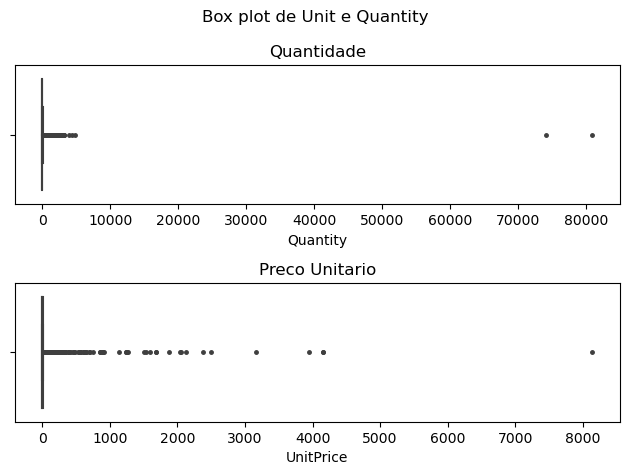

In [ ]:
#plotando boxplot para deteccao de outliers
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Box plot de Unit e Quantity")
ax1 = fig.add_subplot(2,1,1)
sns.boxplot(df1, x="Quantity", orient="h", flierprops={"marker": "."}).set(title="Quantidade")
ax1 = fig.add_subplot(2,1,2)
sns.boxplot(df1, x="UnitPrice", orient="h", flierprops={"marker": "."}).set(title="Preco Unitario")
plt.tight_layout();

In [ ]:
#identificando os outiliers do dataframe usando a funcao .query
df1.query("UnitPrice > 5000 | Quantity > 10000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03,8142.75,16029,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446,United Kingdom


In [ ]:
#removendo os outliers de UNIT PRICE acima de 5000 e Quantity acima de 10000
df1=df1.loc[~(df1["Quantity"] > 10000)]
df1=df1.loc[~(df1["UnitPrice"]> 5000)]

In [ ]:
#checando se a remocao foi feita
df1.query("UnitPrice > 5000 | Quantity > 10000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


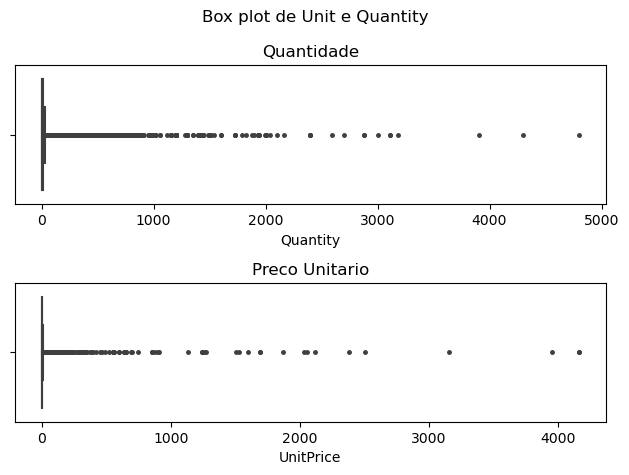

In [ ]:
#plotando boxplot para constatar a remocao dos valores acima de 5000 e 10000
fig=plt.figure()
fig.subplots_adjust(hspace=0.4, top=0.85)
fig.suptitle("Box plot de Unit e Quantity")
ax1 = fig.add_subplot(2,1,1)
sns.boxplot(df1, x="Quantity", orient="h", flierprops={"marker": "."}).set(title="Quantidade")
ax1 = fig.add_subplot(2,1,2)
sns.boxplot(df1, x="UnitPrice", orient="h", flierprops={"marker": "."}).set(title="Preco Unitario")
plt.tight_layout();

In [ ]:
#apos limpar  os valores faltantes NA, duplicado, tirarmos os valores inconsitente de quantity e unitprce
#e tambem alterarmos os tratarmos o valor categorico de UNSPECIFIED no Country, usaremos o describe para sabermos uma
#distribuicao dos valores
df1.describe(percentiles=[.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])

,Quantity,InvoiceDate,UnitPrice,CustomerID,total
count,392447.000000,392447,392447.000000,392447.0,392447.000000
mean,12.727844,2011-07-10 06:03:41.312941312,3.105127,15288.802248,21.992137
min,1.000000,2010-12-01 00:00:00,0.001000,12347.0,0.001000
1%,1.000000,2010-12-03 00:00:00,0.210000,12415.0,0.550000
10%,1.000000,2011-01-21 00:00:00,0.550000,12877.0,2.080000
25%,2.000000,2011-04-07 00:00:00,1.250000,13956.0,4.950000
50%,6.000000,2011-07-31 00:00:00,1.950000,15152.0,12.450000
75%,12.000000,2011-10-20 00:00:00,3.750000,16791.0,19.800000
90%,24.000000,2011-11-20 00:00:00,6.350000,17719.0,35.400000
99%,120.000000,2011-12-07 00:00:00,14.950000,18211.0,203.520000


# Recency, Frequency, Monetary- RFM

* RFM-tecnica de analise usada no marketing para segmentar e avaliar a base de clientes de uma empresa
1. Recency-mede o tempo desde a ultima interacao ou transação do cliente
2. Frequency - mede a frequencia com que um cliente interage ou realiza transacoes com a empresa ao longo de um determinado periodo de tempo
3. Monetary - avalia o valor total que um cliente gasta ou gera para a empresa ao longo de um determinado periodo de tempo

* Algumas etapas foram realizadas antes dos calculos de RECENCY, FREQUENCY, MONETARY, tais como:
1. Cricao de uma coluna de Quantity * UnitPrice resultando numa coluna chamado de "total"
2. Criacao de graficos dos produtos mais vendidos, dos clientes que compraram mais, variacao do compras por mes
3. identificacao das datas maximo e minimo

In [ ]:
#adicionando coluna de quantity * unit price
df1["total"]=df1.apply(lambda x : x["UnitPrice"] * x["Quantity"] , axis=1)


In [ ]:
#analisando se a coluna adicional foi adicionado de maneira correta e corrigindo o index
df1.reset_index(drop=True, inplace=True)
df1.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [ ]:
#calculando a ultima data de compra e a primeira compra
primeira_compra= min(df1["InvoiceDate"])
ultima_compra=max(df1["InvoiceDate"])
print(f"A primeira compra foi no dia {primeira_compra} , ja a ultima compra foi no dia {ultima_compra}")


A primeira compra foi no dia 2010-12-01 00:00:00 , ja a ultima compra foi no dia 2011-12-09 00:00:00


In [ ]:
#determinando os 10 maiores comprados
def top_country(df1:pd.DataFrame, n:int)->pd.DataFrame:
    topcountry=(
        df1
        .groupby("Country")
        .agg({"total":"sum"})
        .rename({"total":"total"})
        .sort_values(by="total", ascending=False)
        .reset_index()
        .head(n)
    )
    return topcountry

topcountry=top_country(df1, 10)
topcountry



,Country,total
0,United Kingdom,7031224.794
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


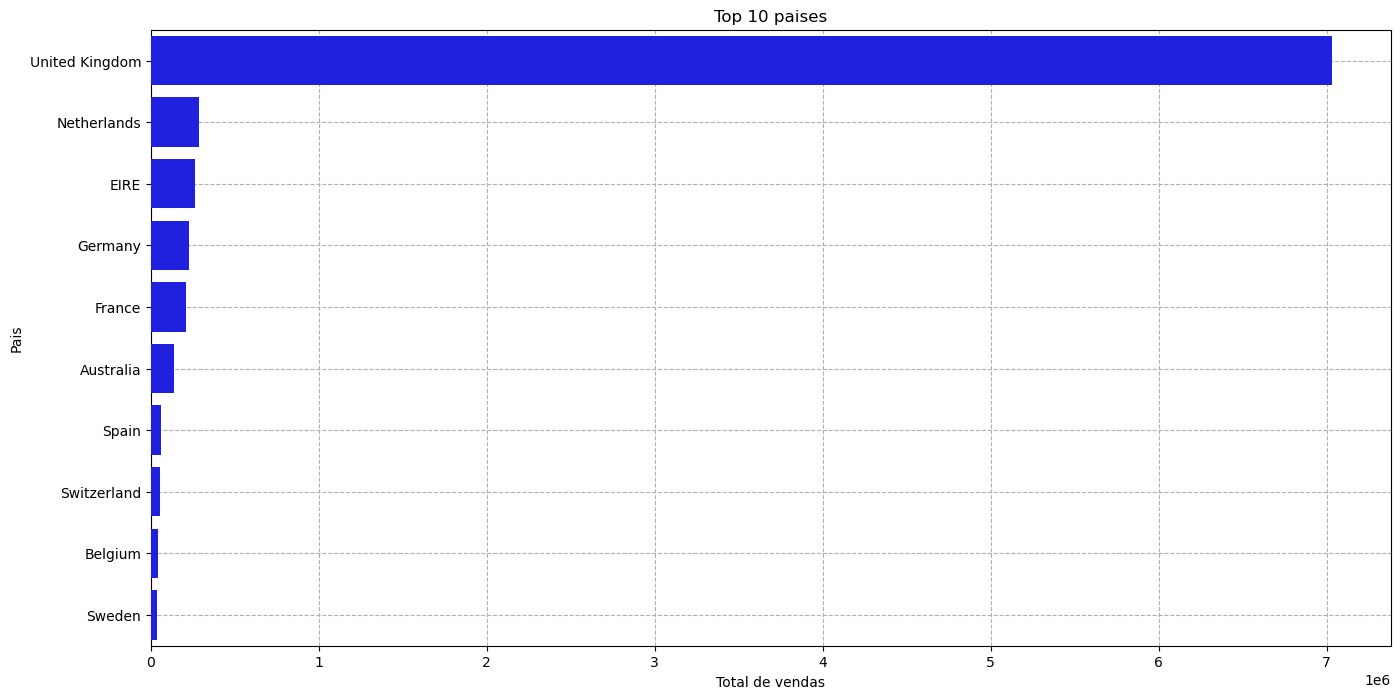

In [ ]:
#plotando grafico de barra horizontal dos dados acima
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
sns.barplot(data=topcountry, x='total', y='Country', ax=ax, color="blue", zorder=10)
ax.set_xlabel('Total de vendas')
ax.set_ylabel('Pais')
ax.set_title("Top 10 paises")
ax.grid(True, linestyle='--', zorder=10);

In [ ]:
#criando os 10 produtos mais vendidos

def recomend_products(df:pd.DataFrame, n:int, agg_fun=sum  )->pd.DataFrame:
    topproducts=(
        df1
        .groupby("Description")
        .agg({"Quantity":agg_fun})
        .sort_values("Quantity", ascending=False)
        .rename({"Quantity":"Quantidade"})
        .reset_index()
        .head(n)
    )
    return topproducts

topproducts=recomend_products(df1, 10, agg_fun="sum")
topproducts



,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35241
4,PACK OF 72 RETROSPOT CAKE CASES,33646
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24206


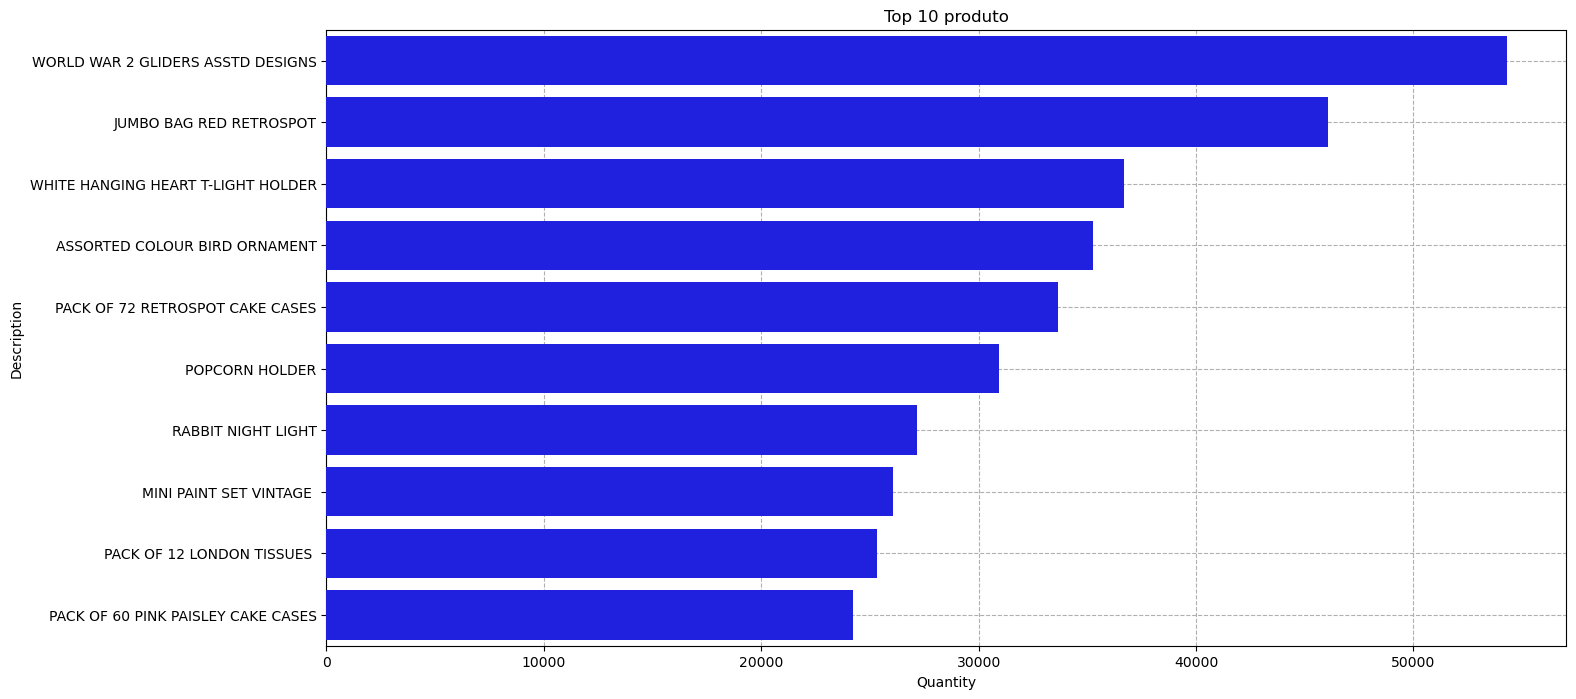

In [ ]:
#criando um grafico de barras horizotal dos dados acima
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
sns.barplot(data=topproducts, x='Quantity', y='Description', ax=ax, color='blue', zorder=10)
ax.set_xlabel('Quantity')
ax.set_ylabel('Description')
ax.set_title("Top 10 produto")
ax.grid(True, linestyle='--', zorder=10)

In [ ]:
def total_mes(df1:pd.DataFrame)->pd.DataFrame:
    totalmes=(
        df1
        .groupby("InvoiceDate")
        .agg({"total":"sum"})
        .reset_index()

 )
    return totalmes


totalmes=total_mes(df1)


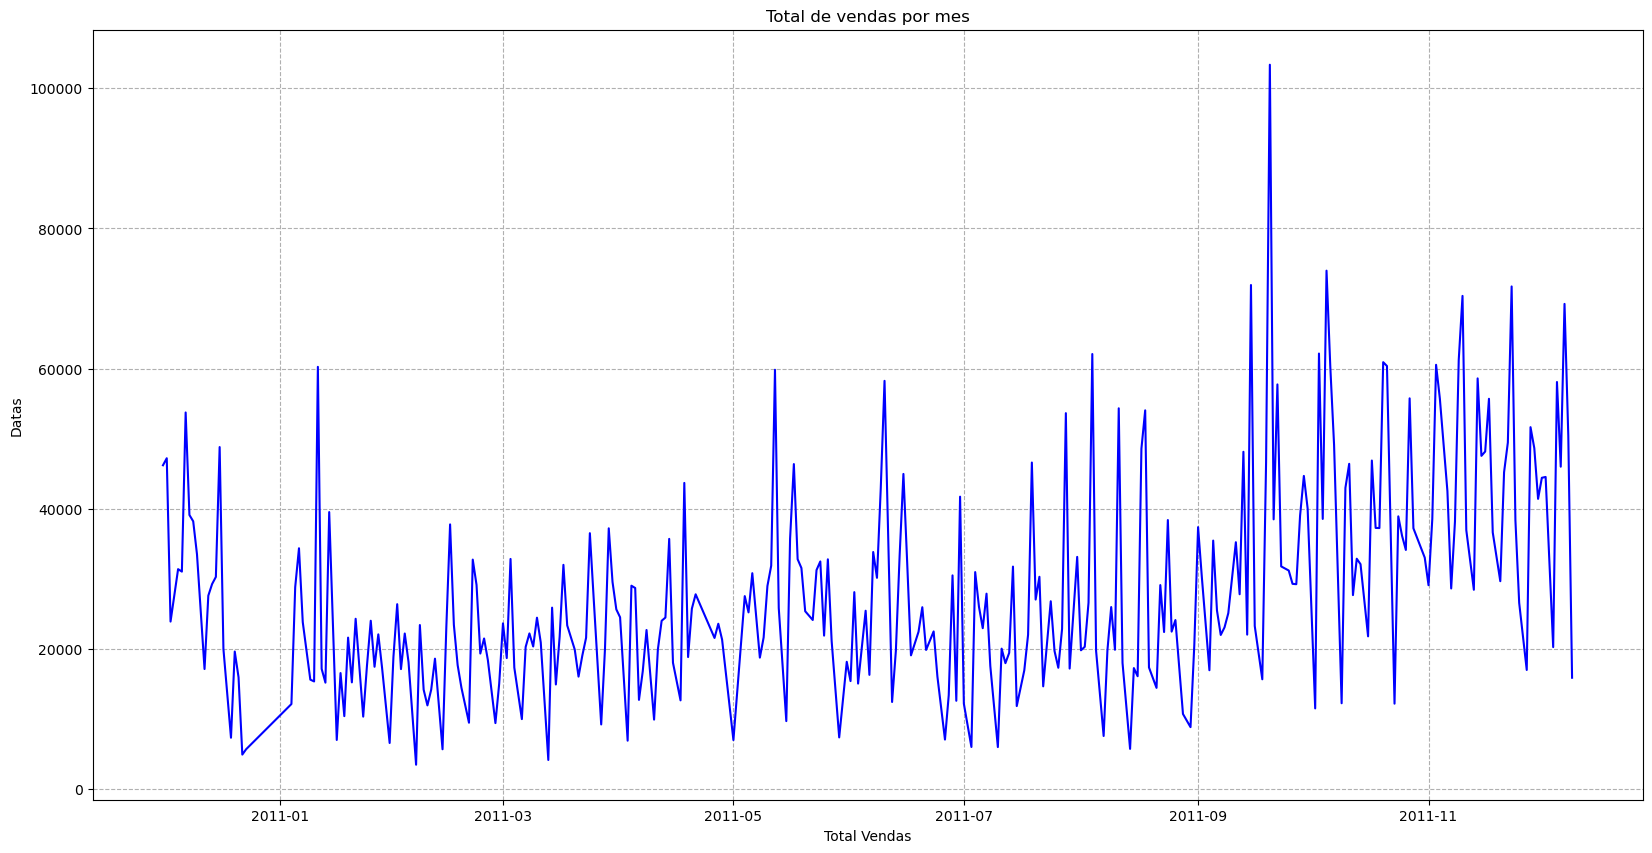

In [ ]:
#variacao das vendas por mes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.lineplot(data=totalmes, x="InvoiceDate", y="total", ax=ax, color='blue', zorder=10)
ax.set_xlabel('Total Vendas')
ax.set_ylabel('Datas')
ax.set_title("Total de vendas por mes")
ax.grid(True, linestyle='--', zorder=10)

In [ ]:
#criando os maiores comprados por mes
def vendamespais(df:pd.DataFrame, n:int)->pd.DataFrame:
    vendatotalpais=(
        df1
        .groupby(["InvoiceDate", "Country"])
        .agg({"total":"sum"})
        .sort_values(by="total", ascending= False)
        .reset_index()
        .head(n)
)
    return vendatotalpais

vendatotalpais=vendamespais(df1, 10)
vendatotalpais

,InvoiceDate,Country,total
0,2011-09-20,United Kingdom,100417.10
1,2011-09-15,United Kingdom,67824.46
2,2011-10-03,United Kingdom,61799.07
3,2011-11-09,United Kingdom,58897.32
4,2011-11-03,United Kingdom,56802.17
5,2011-11-23,United Kingdom,56292.41
6,2011-11-10,United Kingdom,55279.60
7,2011-12-05,United Kingdom,54792.12
8,2011-08-04,United Kingdom,53721.53
9,2011-01-11,United Kingdom,53560.03


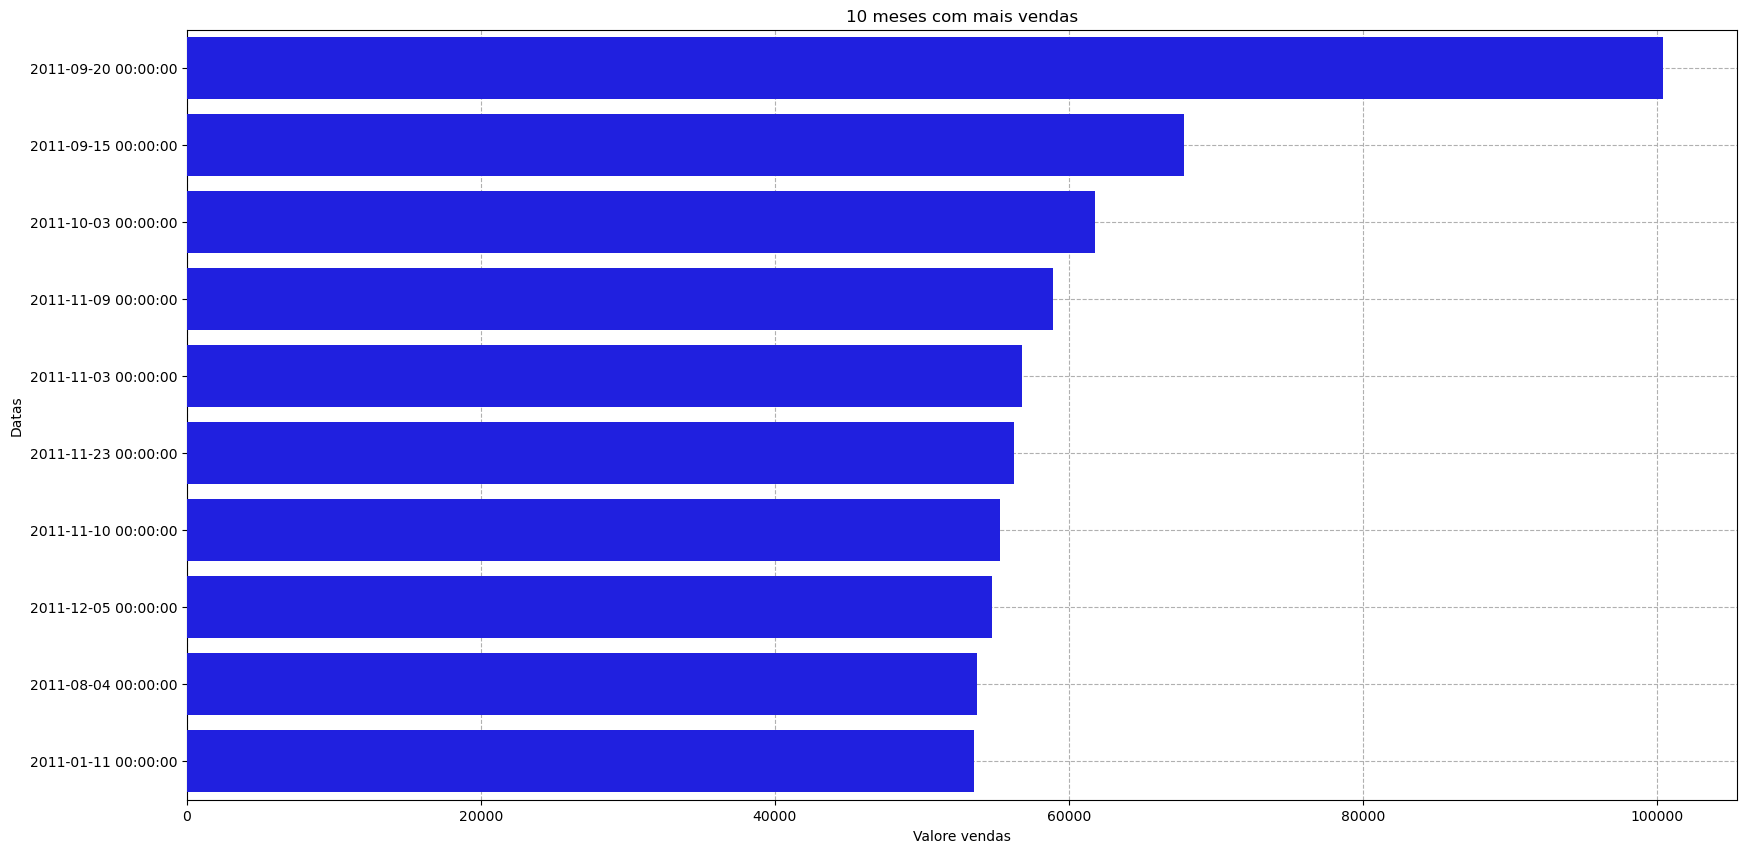

In [ ]:
#criando grafico do dataset acima
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.barplot(data=vendatotalpais, x="total", y="InvoiceDate", ax=ax, color='blue', zorder=10)
ax.set_xlabel('Valore vendas')
ax.set_ylabel('Datas')
ax.set_title("10 meses com mais vendas")
ax.grid(True, linestyle='--', zorder=10)

In [ ]:
#apenas visualizando as colunas que vao ser utilizadas
df1.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.3


In [ ]:
# reavaliando a necessidade de trocar ou nao os tipo de variaveis.
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
total                 float64
dtype: object

Criando as colunas necessarias para o analise de RFM
1. agrupando por CUSTOMERID, e gerando novas colunas de RECENCY usando o valor de ultima compra menos a data maxima.
2. Frequency e gerado pela funcao de contagem .count() para identificarmos com qual frequencia ele consome o produto
3. Monetary vai ser somando o valores da coluna "total" para cada CUSTUMERID usando o .sum()
4. Criando um rank  de ordem crescente ou descrescente dependendo se for RECENCY, FREQUENCY ou MONETARY
5. Normalizando o rank usando o rank atual divido pelo ranking maximo.

In [ ]:
rfm=(
df1
.groupby("CustomerID")
.agg({"InvoiceDate":lambda x : (ultima_compra - x.max() ).days,
      "CustomerID":lambda x : x.count(),
      "total":lambda x : x.sum()})
.rename(columns={"InvoiceDate": "recency", "CustomerID": "frequency", "total": "monetary"})
.reset_index()

 )
rfm.head()


,CustomerID,recency,frequency,monetary
0,12347,2,182,4310.00
1,12348,75,31,1797.24
2,12349,18,73,1757.55
3,12350,310,17,334.40
4,12352,36,85,2506.04


In [ ]:
rfm["r_rank"]=rfm["recency"].rank(ascending=False)
rfm["f_rank"]=rfm["frequency"].rank(ascending=True)
rfm["m_rank"]=rfm["monetary"].rank(ascending=True)
rfm


,CustomerID,recency,frequency,monetary,r_rank,f_rank,m_rank
0,12347,2,182,4310.00,4151.5,3822.5,4001.0
1,12348,75,31,1797.24,1642.0,1834.5,3332.0
2,12349,18,73,1757.55,3205.5,2906.5,3309.0
3,12350,310,17,334.40,226.5,1081.5,1243.0
4,12352,36,85,2506.04,2498.5,3079.0,3637.0
...,...,...,...,...,...,...,...
4328,18280,277,10,180.60,354.0,620.5,572.0
4329,18281,180,7,80.82,860.0,405.0,105.0
4330,18282,7,12,178.05,3834.5,767.0,552.0
4331,18283,3,721,2045.53,4059.5,4302.5,3462.0


In [ ]:
#normalizando os rankings dos clientes para podermos depois calcularmos os valores de RFM
norm=(
rfm.agg({"r_rank": lambda x:x.div(rfm["r_rank"].max())*100,
         "f_rank": lambda x:x.div(rfm["f_rank"].max())*100,
         "m_rank": lambda x:x.div(rfm["m_rank"].max())*100
         })
    .rename(columns={"r_rank":"r_norm", "f_rank":"f_norm", "m_rank":"m_norm"})
    )

rfm=(pd.concat([rfm, norm], axis=1)
.drop(columns=["r_rank", "f_rank", "m_rank"]))


In [ ]:
rfm.head()

,CustomerID,recency,frequency,monetary,r_norm,f_norm,m_norm
0,12347,2,182,4310.00,96.177459,88.218324,92.337872
1,12348,75,31,1797.24,38.040079,42.337872,76.898223
2,12349,18,73,1757.55,74.261555,67.078237,76.367413
3,12350,310,17,334.40,5.247307,24.959612,28.686822
4,12352,36,85,2506.04,57.882544,71.059312,83.937226


O valor RFM e calculado baseado nos valores normalizados do  RECENCY, FREQUENCY, MONETARY, com isso podemos dividir nossos consumidores, numa escala de 0 a 5
a formula usada para esse calulcalo  e :0.15* RECENCY+0.28*Frequency+0.57*Monetary

In [ ]:
#calculando o score do RFM
rfm["Score"]=rfm.apply(lambda row :0.15*row["r_norm"]+0.28*row["f_norm"]+0.57*row["m_norm"], axis=1 )
rfm['Score'] *= 0.05 # rfm["Score"].apply(lambda x:x * 0.05)
rfm=rfm[["CustomerID","monetary", "Score"]].sort_values(by="Score", ascending=False)

In [ ]:
rfm

,CustomerID,monetary,Score
2172,15311,60632.75,4.991149
1685,14646,280206.02,4.986159
1875,14911,143711.17,4.985802
323,12748,33053.19,4.981929
4005,17841,40519.84,4.974943
...,...,...,...
1811,14821,48.80,0.066996
2634,15940,35.80,0.064476
3212,16738,3.75,0.060480
1636,14576,35.40,0.029887


classificando nossos clientes
rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.6 : Low-value customer
rfm score<1.6 :Lost Customer


In [ ]:
rfm["segment"]=(
np.where(rfm["Score"]>4.5, "TopCustomer",
(np.where(rfm["Score"] >4 , "HighValue",
(np.where(rfm["Score"]>3, "Medium customer",
(np.where(rfm["Score"]>1.6, "Low Customer", "LostCustomer"))))))))
rfm


,CustomerID,monetary,Score,segment
2172,15311,60632.75,4.991149,TopCustomer
1685,14646,280206.02,4.986159,TopCustomer
1875,14911,143711.17,4.985802,TopCustomer
323,12748,33053.19,4.981929,TopCustomer
4005,17841,40519.84,4.974943,TopCustomer
...,...,...,...,...
1811,14821,48.80,0.066996,LostCustomer
2634,15940,35.80,0.064476,LostCustomer
3212,16738,3.75,0.060480,LostCustomer
1636,14576,35.40,0.029887,LostCustomer


In [ ]:
# criando um a media de monetary que cada " classe" de clientes gastam na nossa plataforma
def segmentacao(df:pd.DataFrame):
    segment=(
    rfm
    .groupby("segment")
    .agg({"monetary":"mean"})
    .sort_values(by="monetary", ascending= False)
    .reset_index()
)
    return segment

segment=segmentacao(rfm)
segment

,segment,monetary
0,TopCustomer,14607.268131
1,HighValue,3679.064901
2,Medium customer,1799.758340
3,Low Customer,660.055119
4,LostCustomer,216.448537


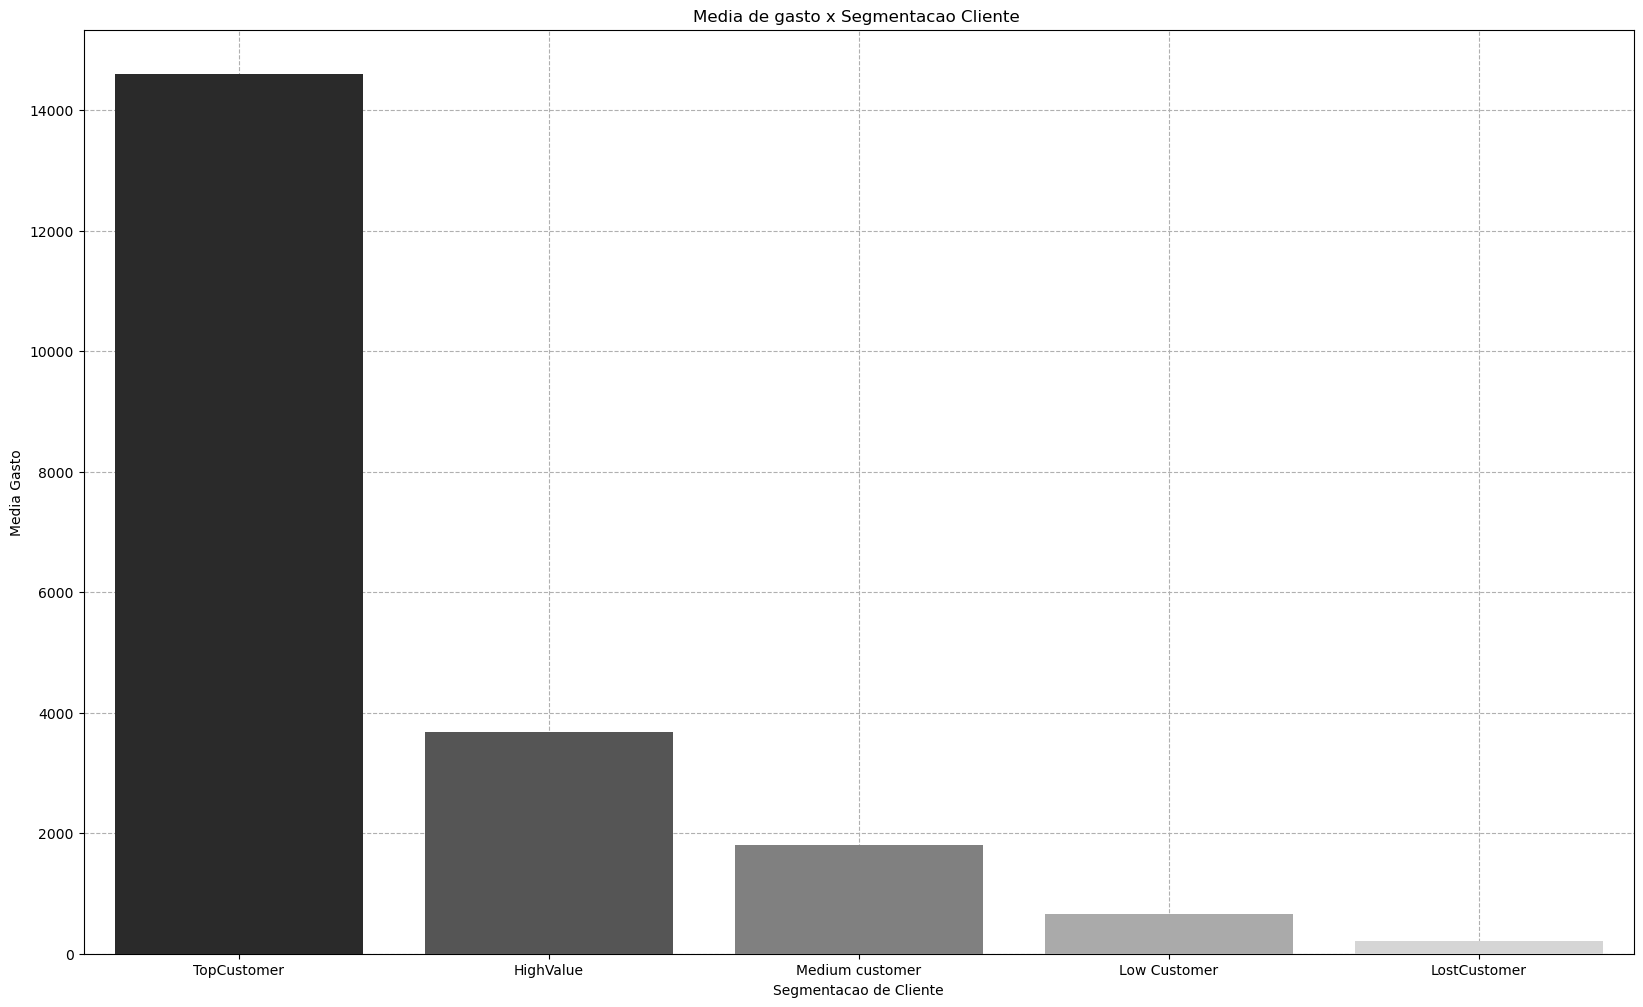

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,12))
sns.barplot(data=segment, x='segment', y='monetary', ax=ax, palette='gray', zorder=10)
ax.set_xlabel('Segmentacao de Cliente')
ax.set_ylabel('Media Gasto')
ax.set_title("Media de gasto x Segmentacao Cliente ")
ax.grid(True, linestyle='--', zorder=10)